In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import cmath

In [2]:
def load_object_from_pkl(filename):
    """
    Load an object from a .pkl file using pickle.
    
    Parameters:
        filename (str): The name of the .pkl file.
    
    Returns:
        object: The loaded object from the .pkl file.
    """
    with open(filename, 'rb') as f:
        obj = pickle.load(f)
    print(f"Object loaded from {filename}")
    return obj

In [3]:
data_a_0 = load_object_from_pkl("/Users/ernst/Desktop/rb_photon_prod_dev/saved_data/vstirap_length_rate/data_lensweep_omegaL:12.5.pkl")
data_a_1 = load_object_from_pkl("/Users/ernst/Desktop/rb_photon_prod_dev/saved_data/vstirap_length_rate/data_lensweep_omegaL:25.0.pkl")
data_a_2 = load_object_from_pkl("/Users/ernst/Desktop/rb_photon_prod_dev/saved_data/vstirap_length_rate/data_lensweep_omegaL:37.5.pkl")
data_a_3 = load_object_from_pkl("/Users/ernst/Desktop/rb_photon_prod_dev/saved_data/vstirap_length_rate/data_lensweep_omegaL:50.0.pkl")
data_a_4 = load_object_from_pkl("/Users/ernst/Desktop/rb_photon_prod_dev/saved_data/vstirap_length_rate/data_lensweep_omegaL:62.5.pkl")
data_a_5 = load_object_from_pkl("/Users/ernst/Desktop/rb_photon_prod_dev/saved_data/vstirap_length_rate/data_lensweep_omegaL:75.0.pkl")
data_a_6 = load_object_from_pkl("/Users/ernst/Desktop/rb_photon_prod_dev/saved_data/vstirap_length_rate/data_lensweep_omegaL:87.5.pkl")
data_a_7 = load_object_from_pkl("/Users/ernst/Desktop/rb_photon_prod_dev/saved_data/vstirap_length_rate/data_lensweep_omegaL:100.0.pkl")

data_full = [data_a_0, data_a_1, data_a_2, data_a_3, data_a_4, data_a_5, data_a_6, data_a_7]

Object loaded from /Users/ernst/Desktop/rb_photon_prod_dev/saved_data/vstirap_length_rate/data_lensweep_omegaL:12.5.pkl
Object loaded from /Users/ernst/Desktop/rb_photon_prod_dev/saved_data/vstirap_length_rate/data_lensweep_omegaL:25.0.pkl
Object loaded from /Users/ernst/Desktop/rb_photon_prod_dev/saved_data/vstirap_length_rate/data_lensweep_omegaL:37.5.pkl
Object loaded from /Users/ernst/Desktop/rb_photon_prod_dev/saved_data/vstirap_length_rate/data_lensweep_omegaL:50.0.pkl
Object loaded from /Users/ernst/Desktop/rb_photon_prod_dev/saved_data/vstirap_length_rate/data_lensweep_omegaL:62.5.pkl
Object loaded from /Users/ernst/Desktop/rb_photon_prod_dev/saved_data/vstirap_length_rate/data_lensweep_omegaL:75.0.pkl
Object loaded from /Users/ernst/Desktop/rb_photon_prod_dev/saved_data/vstirap_length_rate/data_lensweep_omegaL:87.5.pkl
Object loaded from /Users/ernst/Desktop/rb_photon_prod_dev/saved_data/vstirap_length_rate/data_lensweep_omegaL:100.0.pkl


In [4]:
##VSTIRAP 1

phase=data_a_0[0][6][12][0][28]
print(phase)
norm=np.abs(phase)
print(phase/norm)
print(cmath.phase(phase/norm))


(-0.006118536526111953-0.00036746129885878025j)
(-0.9982014388287729-0.05994904102792189j)
-3.081607646012844


In [7]:
## VSTIRAP 2

phase=data_a_0[1][6][12][0][28]
print(phase)
norm=np.abs(phase)
print(phase/norm)
print(cmath.phase(phase/norm))

(-0.0015004502691660013-0.0012831169179993922j)
(-0.7600027623476424-0.6499198421528251j)
-2.4341136920896362


In [6]:
len_list=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.5,2]

full_analysis_data=[]

for data_a_0 in data_full:
    phase_list_e=[]
    phase_list_l=[]
    n_ph_e=[]
    n_ph_l=[]
    n_ph_t=[]
    n_err_e=[]
    n_err_l=[]
    n_err_t=[]

    scattering_e=[]
    scattering_l=[]

    for i in range(len(len_list)):
        n_ph_e.append(data_a_0[int(2*i)][5])
        n_ph_l.append(data_a_0[int(2*i+1)][5])
        n_ph_t.append(data_a_0[int(2*i)][5]+data_a_0[int(2*i+1)][5])
        n_err_e.append(data_a_0[int(2*i)][4])
        n_err_l.append(data_a_0[int(2*i+1)][4])
        n_err_t.append(data_a_0[int(2*i)][4]+data_a_0[int(2*i+1)][4])
        phase_e=data_a_0[int(2*i)][6][12][0][28]
        phase_l=data_a_0[int(2*i+1)][6][12][0][28]
        norm_e=np.abs(phase_e)
        norm_l=np.abs(phase_l)
        phase_list_e.append(np.abs(cmath.phase(phase_e/norm_e)))
        phase_list_l.append(np.abs(cmath.phase(phase_l/norm_l)))
        scattering_e.append(data_a_0[int(2*i)][3])
        scattering_l.append(data_a_0[int(2*i+1)][3])
    
    full_analysis_data.append([n_ph_e,n_ph_l,n_ph_t,phase_list_e,phase_list_l,scattering_e,scattering_l, n_err_e, n_err_l, n_err_t])


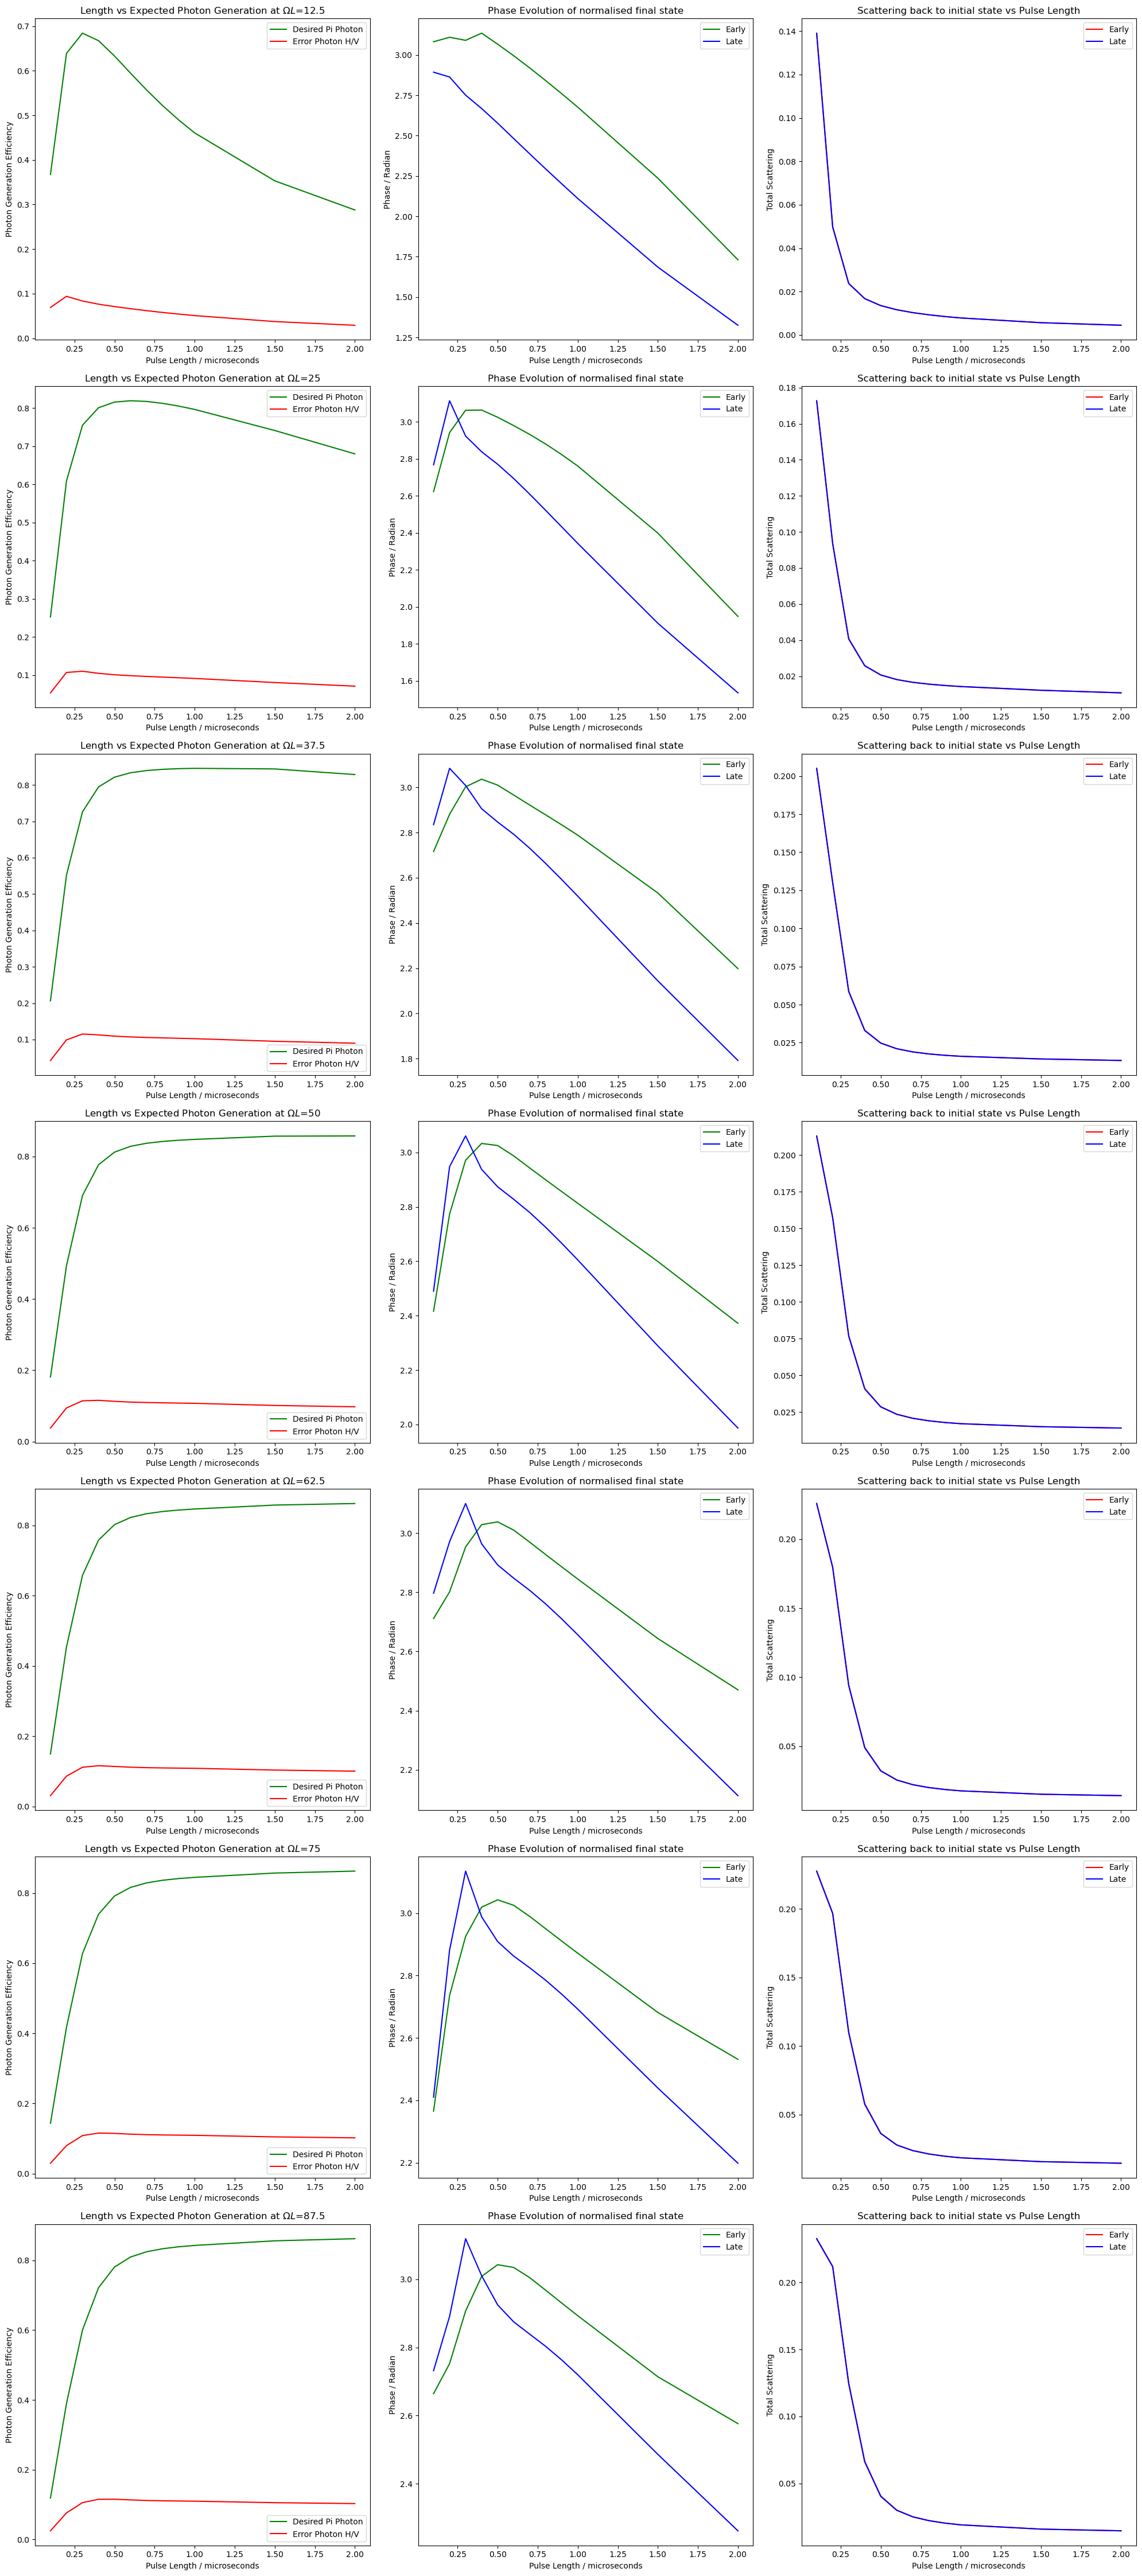

In [34]:
area_indexes=[0,1,2,3,4,5,6]
pulse_areas=[12.5,25,37.5,50,62.5,75,87.5,100]

# Create figure and axes
fig, axs = plt.subplots(7, 3, figsize=(20, 45))

# Plot data

for i in range(7):

    axs[i, 0].plot(len_list, full_analysis_data[area_indexes[i]][2], color='g', label='Desired Pi Photon')
    axs[i, 0].errorbar(len_list, full_analysis_data[area_indexes[i]][9], color='r', label='Error Photon H/V')
    axs[i,0].legend()
    axs[i, 0].set_title(f'Length vs Expected Photon Generation at $\Omega L$={pulse_areas[i]}')
    axs[i, 0].set_xlabel('Pulse Length / microseconds')
    axs[i, 0].set_ylabel('Photon Generation Efficiency')

    axs[i, 1].plot(len_list, full_analysis_data[area_indexes[i]][3], color='g', label="Early")
    axs[i, 1].plot(len_list, full_analysis_data[area_indexes[i]][4], color='b', label="Late")
    axs[i, 1].legend()
    axs[i, 1].set_title('Phase Evolution of normalised final state')
    axs[i, 1].set_xlabel('Pulse Length / microseconds')
    axs[i, 1].set_ylabel('Phase / Radian')

    axs[i, 2].plot(len_list, full_analysis_data[area_indexes[i]][5], color='r' , label="Early")
    axs[i, 2].plot(len_list, full_analysis_data[area_indexes[i]][6], color='b', label="Late")
    axs[i, 2].legend()
    axs[i, 2].set_title('Scattering back to initial state vs Pulse Length')
    axs[i, 2].set_xlabel('Pulse Length / microseconds')
    axs[i, 2].set_ylabel('Total Scattering')


# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

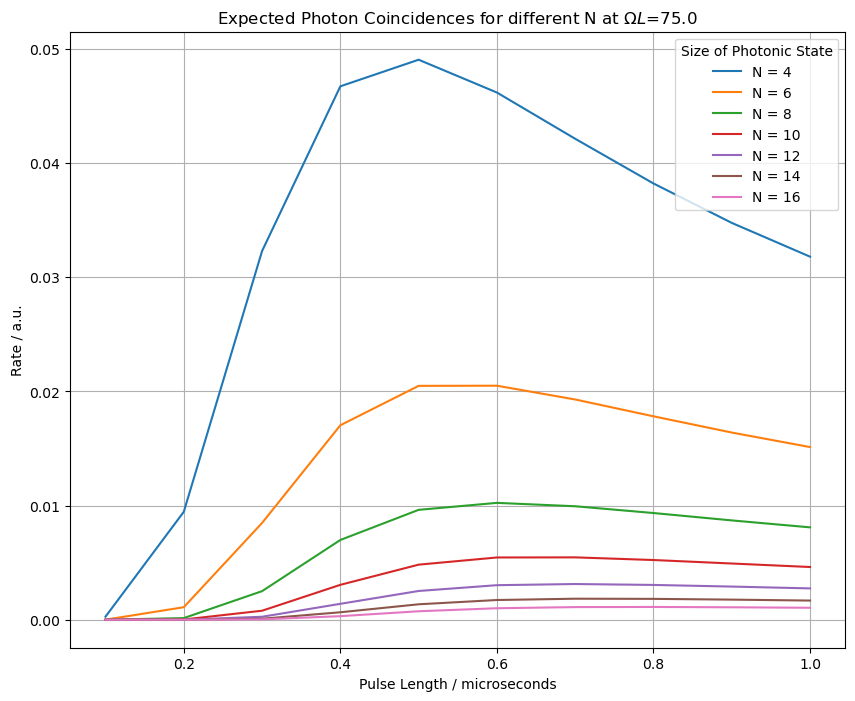

In [48]:
#pickout one fixed pulse area and consider rate optimisation

def rate_function(l,n):
    ind = np.where(l_list == l)[0][0]
    eta=full_analysis_data[5][2][ind]
    return eta**n/(4*l*n)

# Define values for l and n
l_list = np.array(len_list[0:10])
n_list = np.arange(4, 18, 2)

# Plot the rate function for each value of N
plt.figure(figsize=(10, 8))
for n in n_list:
    R = [rate_function(l, n) for l in l_list]
    plt.plot(l_list, R, label=f'N = {n}')

# Set labels and title
plt.xlabel('Pulse Length / microseconds')
plt.ylabel('Rate / a.u.')
plt.title('Expected Photon Coincidences for different N at $\Omega L$=75.0')
plt.legend(title='Size of Photonic State', loc='upper right')

# Show plot
plt.grid(True)
plt.show()




